# Homework Week 8

For each of the following questions please show that the statistical assumptions for each of the respective tests are met. It is good practice always before start using statistical analysis to do descriptive statistics to understand you data. It is not required to show descriptive analysis here unless there is something important to report (transformations, deviation from normality, outliers, etc).

1. The data in the table give the infant mortality rates per 1000 livebirths in the United States for the period 1960-2000


![title](HW1.png)

a. Fit a linear regression line relating infant mortality rate to chronological year using these data. Use a data transformation if necessary

b. Test for significance of the linear relationship

c. If the present trend continues for the next 5 years what would be the predicted infant mortality rate in 2010


[1] "a"

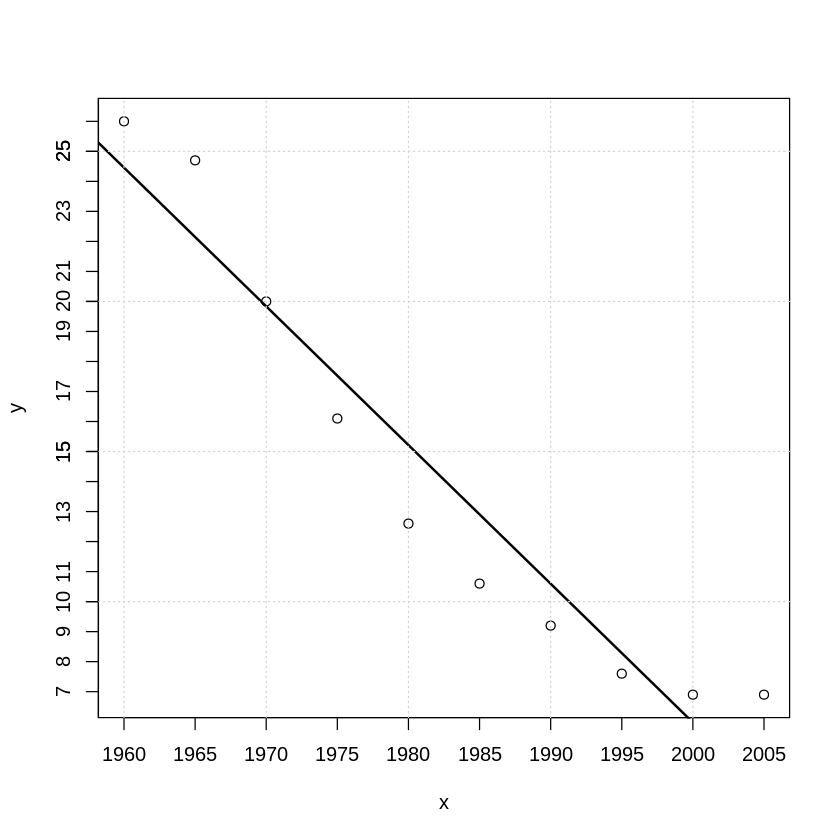

In [1]:
#from the table above, we have the data from 1960 to 2005 of infant motality per 1000 livebirths:
'a'
#we have x values:
x<-c(1960,1965,1970,1975,1980,1985,1990,1995,2000,2005)
#and y values:
y<-c(26.0,24.7,20.0,16.1,12.6,10.6,9.2,7.6,6.9,6.9)

#we can draw a linear regression:
relation <- lm(y ~ x)
plot(x, y, xaxt="n")
axis(side=1, at = seq(1960, 2005, by = 5))
axis(side=2, at= seq(0,30,1))
abline(relation, lwd=2)
grid(nx = NULL,ny = NULL)

In [2]:
'b'
coef(relation)
summary(relation)

[1] "b"

(Intercept)           x 
930.0951515  -0.4620606


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-2.615 -1.418 -0.260  1.389  3.236 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 930.09515   93.70477   9.926 8.97e-06 ***
x            -0.46206    0.04726  -9.776 1.00e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.147 on 8 degrees of freedom
Multiple R-squared:  0.9228,	Adjusted R-squared:  0.9131 
F-statistic: 95.57 on 1 and 8 DF,  p-value: 1.005e-05


In [3]:
'c'
a<-data.frame(x=2010)
predict(relation,a)

[1] "c"

1 
1.353333

$2.$ The file HackerRank-Developer-Survey-2018-Numeric.csv shows an extensive survey obtained in 2016 to 25000 Hackers. The survey asked developers many questions around their skills, educational background, current role, and more... Answer the following questions using the data from this file. The file HackerRank-Developer-Survey-2018-Numeric-Mapping.csv has the metadata that explains the coding on each variable. 
This data was obtained from Kaggle at [https://www.kaggle.com/hackerrank/developer-survey-2018](https://www.kaggle.com/hackerrank/developer-survey-2018) There is more information regarding the survey and the data itself at the website.

a. Is there a relationship between gender and the Age that the hacker begin coding(q1AgeBeginCoding)? (Use a logistic regression)

b. Does age to begin coding, and gender have an effect on job level (q8JobLevel)? (Use MLR)

c. There is an increase focus on understanding trends about women pursuing careers as developers are there any relationships in the data that could be useful advice to women that want to pursue a career as a developer? The zip file has many other variables that you can use for this analysis. 

In [4]:

library(ggplot2)
library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
#hacker <- unzip('developer-survey-2018.zip')
df0 <- read.csv(file = "HackerRank-Developer-Survey-2018-Numeric-Mapping.csv", header = T, dec = ',')

df0[df0[1]=='q8JobLevel',]

,Data.Field,Value,Label
42,q8JobLevel,0,Other (please specify)
43,q8JobLevel,1,Student
44,q8JobLevel,2,New grad
45,q8JobLevel,3,Freelancer
46,q8JobLevel,4,Level 1 developer (junior)
47,q8JobLevel,5,Senior developer
48,q8JobLevel,6,Principal engineer
49,q8JobLevel,7,Architect
50,q8JobLevel,8,Engineering manager
51,q8JobLevel,9,Director / VP of Engineering


In [6]:
df <- read.csv(file = "HackerRank-Developer-Survey-2018-Numeric.csv", header = T, dec = ',')
dim(df)[1]
#df <- na.omit(df)
#df

[1] 25090

In [7]:
'a. Is there a relationship between gender and the Age that the hacker begin coding(q1AgeBeginCoding)? (Use a logistic regression)'
#find the count of males and females
gender <- table(df$q3Gender)
#gender

#names(gender)[names(gender) == '1'] <- "Males"
#gender
#names(gender)[names(gender) == '2'] <- "Females"
#gender
df_gender <- data.frame(Gender = c("Males", "Females"), count = c(gender[2], gender[3]))
df_gender

[1] "a. Is there a relationship between gender and the Age that the hacker begin coding(q1AgeBeginCoding)? (Use a logistic regression)"

Gender,count
Males,20774
Females,4122


In [8]:

#find relationship between genders and age
a <- dplyr::count(df, q1AgeBeginCoding, q3Gender)
a <- a[(a$q3Gender==1 | a$q3Gender==2) & a$q1AgeBeginCoding!="#NULL!",]
age <- a %>% group_by(q3Gender) %>% mutate(percent = (round(n/sum(n), digits=3))*100) #group by genders and percentage by age
age

q1AgeBeginCoding,q3Gender,n,percent
1,1,848,4.1
1,2,71,1.7
2,1,4651,22.4
2,2,569,13.8
3,1,11543,55.6
3,2,2657,64.5
4,1,2998,14.4
4,2,609,14.8
5,1,506,2.4
5,2,130,3.2


[1] "comparision graph between genders with group age begins coding"

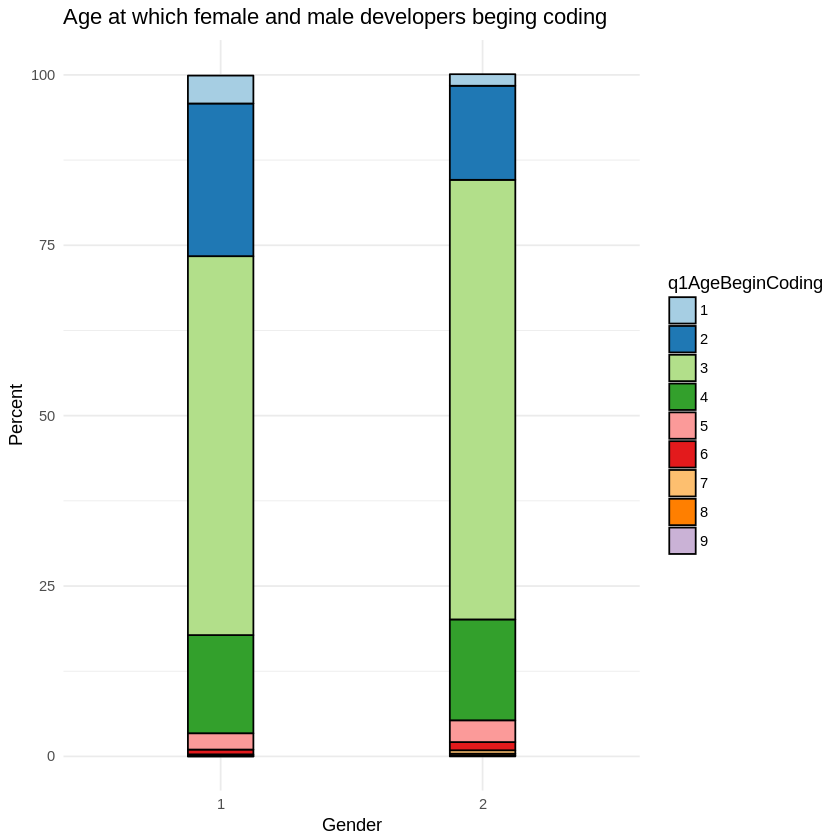

In [9]:
"comparision graph between genders with group age begins coding"
p <- ggplot(data=age, aes(x=q3Gender, y=percent, fill=q1AgeBeginCoding)) + geom_bar(stat="identity", width=0.25, color="black")
p + theme_minimal() + 
  scale_fill_brewer(palette="Paired") +
  labs(title="Age at which female and male developers beging coding", x="Gender", y="Percent")

In [10]:

agegender <- dnumber[,c("q1AgeBeginCoding","q3Gender")]
agegender <- na.omit(agegender)


ERROR: Error in eval(expr, envir, enclos): object 'dnumber' not found


In [ ]:
genderage <- glm(q3Gender ~ q1AgeBeginCoding-1, data = agegender, family = 'binomial')
summary(genderage)
"statistic calculation showed that there are significant impact in agegroup 1,3,4"

In [ ]:
'b. Does age to begin coding, and gender have an effect on job level (q8JobLevel)? (Use MLR)'

In [ ]:
job <- table(df$q8JobLevel)
job

In [11]:
b <- dplyr::count(df, q1AgeBeginCoding, q3Gender, q8JobLevel)
b <- b[(b$q3Gender==1 | b$q3Gender==2) & b$q1AgeBeginCoding!="#NULL!",]
agejob <- b %>% group_by(q8JobLevel) %>% mutate(percent = (round(n/sum(n), digits=3))*100) #group by joblevel
agejob

q1AgeBeginCoding,q3Gender,q8JobLevel,n,percent
1,1,0,40,4.2
1,1,1,202,2.0
1,1,2,7,0.8
1,1,3,24,5.0
1,1,4,76,1.7
1,1,5,298,5.2
1,1,6,53,8.0
1,1,7,45,8.8
1,1,8,36,8.5
1,1,9,22,16.2


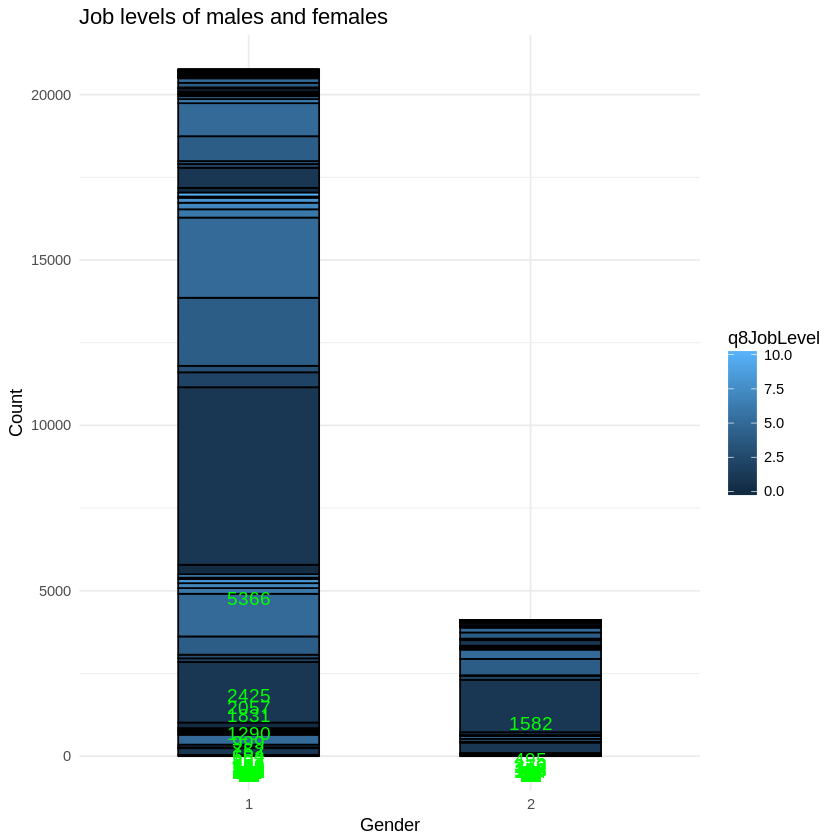

In [12]:

# PLOT: Degree focus by gender
pp <- ggplot(data=agejob, aes(x=q3Gender, y=n, fill=q8JobLevel)) + geom_bar(stat="identity", width=0.5, color="black") + 
    geom_text(aes(label=n), vjust = 2, color = "green", size=4)
    pp + theme_minimal() +
    labs(title="Job levels of males and females", x="Gender", y="Count")

In [13]:
install.packages("mosaic")
library(mosaic)
library(tibble)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice
Loading required package: ggformula

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.

Attaching package: ‘mosaic’

The following object is masked from ‘package:Matrix’:

    mean

The following objects are masked from ‘package:dplyr’:

    count, do, tally

The following objects are masked from ‘package:stats’:

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var

The following objects are masked from 

In [14]:
jobage <- df[,c("q1AgeBeginCoding","q3Gender","q8JobLevel")]
jobage <- na.omit(jobage)
# Create the relationship model.
model <- lm(q8JobLevel~q1AgeBeginCoding+q3Gender-1, data = jobage)
#model2 <- glm(q8JobLevel~q3Gender, data = jobage)
#model3 <- glm(q8JobLevel~q1AgeBeginCoding, data = jobage)
coef(model)
summary(model)
rsquared(model)

#summary(model2)

#summary(model3)
"based on statistical analysis, there are significant in job level with age begin coding and being female"

q1AgeBeginCoding#NULL!      q1AgeBeginCoding1      q1AgeBeginCoding2 
             2.5156347              4.6070833              3.6635827 
     q1AgeBeginCoding3      q1AgeBeginCoding4      q1AgeBeginCoding5 
             3.2104996              4.1056981              3.8912166 
     q1AgeBeginCoding6      q1AgeBeginCoding7      q1AgeBeginCoding8 
             3.5554308              3.2127936              2.8661919 
     q1AgeBeginCoding9              q3Gender1              q3Gender2 
             4.2958559             -0.3540425             -1.0551323 
             q3Gender3 
            -0.5696612


Call:
lm(formula = q8JobLevel ~ q1AgeBeginCoding + q3Gender - 1, data = jobage)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2530 -1.8565 -0.1554  1.6905  7.8446 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
q1AgeBeginCoding#NULL!   2.5156     0.4231   5.945 2.80e-09 ***
q1AgeBeginCoding1        4.6071     0.2835  16.250  < 2e-16 ***
q1AgeBeginCoding2        3.6636     0.2766  13.247  < 2e-16 ***
q1AgeBeginCoding3        3.2105     0.2752  11.666  < 2e-16 ***
q1AgeBeginCoding4        4.1057     0.2770  14.819  < 2e-16 ***
q1AgeBeginCoding5        3.8912     0.2879  13.514  < 2e-16 ***
q1AgeBeginCoding6        3.5554     0.3167  11.228  < 2e-16 ***
q1AgeBeginCoding7        3.2128     0.3825   8.399  < 2e-16 ***
q1AgeBeginCoding8        2.8662     0.4634   6.185 6.33e-10 ***
q1AgeBeginCoding9        4.2959     0.8178   5.253 1.51e-07 ***
q3Gender1               -0.3540     0.2754  -1.286  0.19857    
q3Gender2               -1.0551     0.2770

[1] 0.6670153

[1] "based on statistical analysis, there are significant in job level with age begin coding and being female"

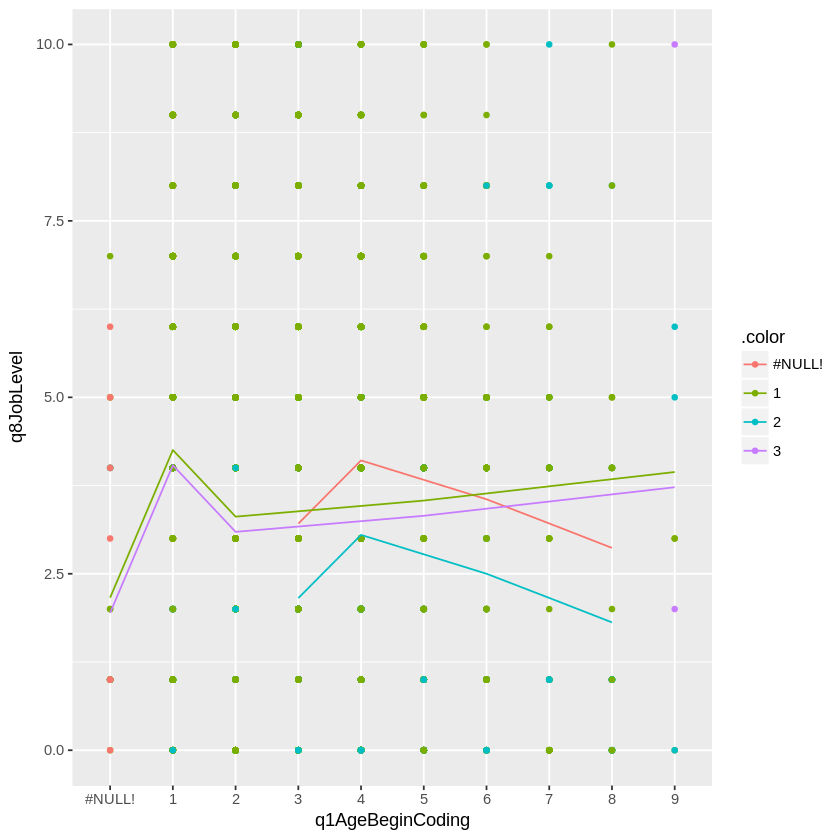

In [15]:
plotModel(model, system = "ggplot2")

$3.$ The data set below represents the expected recovery time (in weeks) for patients after a surgical procedure with different post-operational methods for recovery. Negative values represent a faster recovery time than expected. The control patients followed a rutine post-operational for this type of procedure.

Using the data set below compare the effect of three treatments on the expected time of recovery after surgery. (Use ANOVA)

In [16]:
Recovery = c(.53, .36, .20, -.37, -.60, -.64, -.68, -1.27, .73, .31, .03, -.29, -.56, -.96, -1.61,
         -.78, -.86, -1.35, -1.48, -1.52, -2.04, -2.83)
treatment = c(rep("control",8), rep("surgery",7), rep("acupunture",7))
data = data.frame(Recovery, treatment)
levels(data$treatment)

[1] "acupunture" "control"    "surgery"

In [17]:
data$treatment <- ordered(data$treatment,
                         levels = c("acupunture", "control", "surgery"))

In [18]:
library(dplyr)
group_by(data, treatment) %>%
  summarise(
    count = n(),
    mean = mean(Recovery, na.rm = TRUE),
    sd = sd(Recovery, na.rm = TRUE)
  )

treatment,count,mean,sd
acupunture,7,-1.5514286,0.7063151
control,8,-0.3087500,0.6175629
surgery,7,-0.3357143,0.7908193


In [19]:
install.packages("ggpubr")
# Box plots
# ++++++++++++++++++++
# Plot weight by group and color by group
library("ggpubr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: magrittr


[1] "from the graph, accupunction showed better recovery than control and surgery recovery methods"

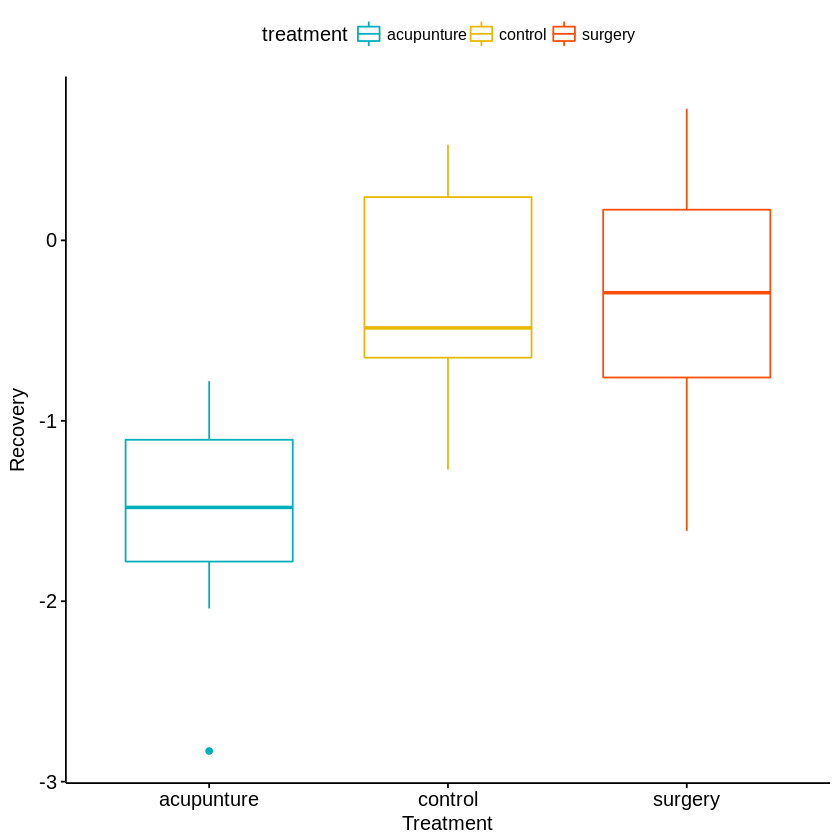

In [20]:
ggboxplot(data, x = "treatment", y = "Recovery", 
          color = "treatment", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
          order = c("acupunture", "control", "surgery"),
          ylab = "Recovery", xlab = "Treatment")

"from the graph, accupunction showed better recovery than control and surgery recovery methods"

In [21]:
res.aov <-aov(Recovery ~ treatment, data = data)
summary(res.aov)


            Df Sum Sq Mean Sq F value  Pr(>F)   
treatment    2  7.224   3.612   7.289 0.00447 **
Residuals   19  9.415   0.496                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [22]:
TukeyHSD(res.aov)
"this showed there are significant between accupuncture compared with control and surgery"

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Recovery ~ treatment, data = data)

$treatment
                          diff        lwr       upr     p adj
control-acupunture  1.24267857  0.3171207 2.1682364 0.0078656
surgery-acupunture  1.21571429  0.2598022 2.1716263 0.0116776
surgery-control    -0.02696429 -0.9525222 0.8985936 0.9969851


[1] "this showed there are significant between accupuncture compared with control and surgery"

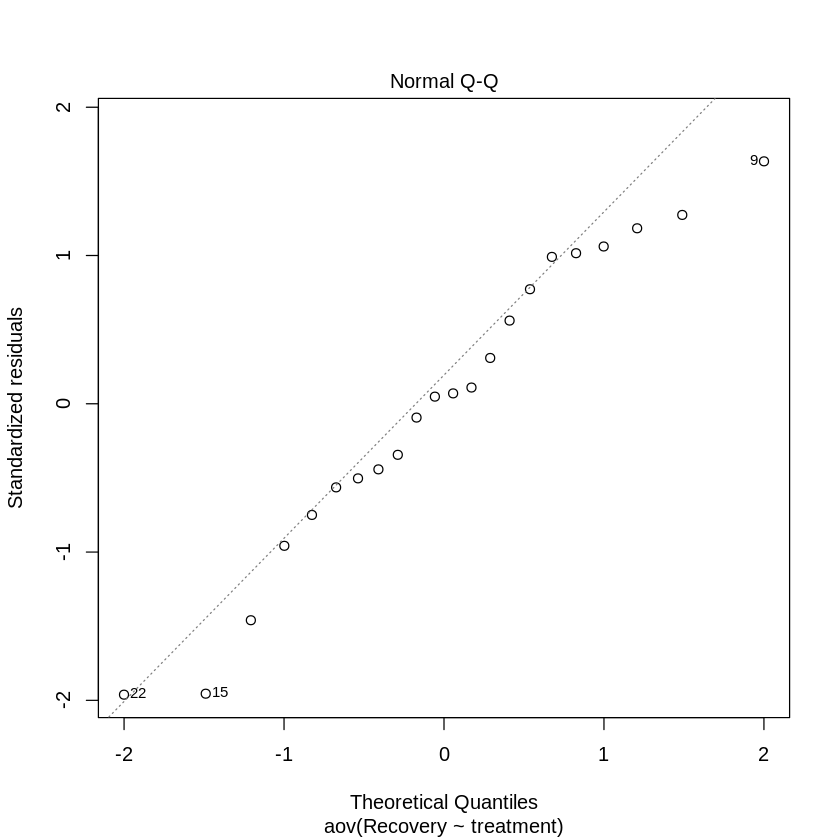

In [23]:
plot(res.aov, 2)